# Code Clause Data Science Intern

# NAME  : Ashwanth Narlapally

# Stock Analysis Using Machine Learning



# Importing Required Libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [81]:
data=pd.read_csv("Tesla.csv - Tesla.csv.csv")
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [83]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

# EDA

In [84]:
data['Date']=pd.to_datetime(data['Date'])

In [85]:
print(f'Dataframe contains stock prices between {data.Date.min()} {data.Date.max()}')
print(f'Total days={(data.Date.max()-data.Date.min()).days}days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2017-03-17 00:00:00
Total days=2453days


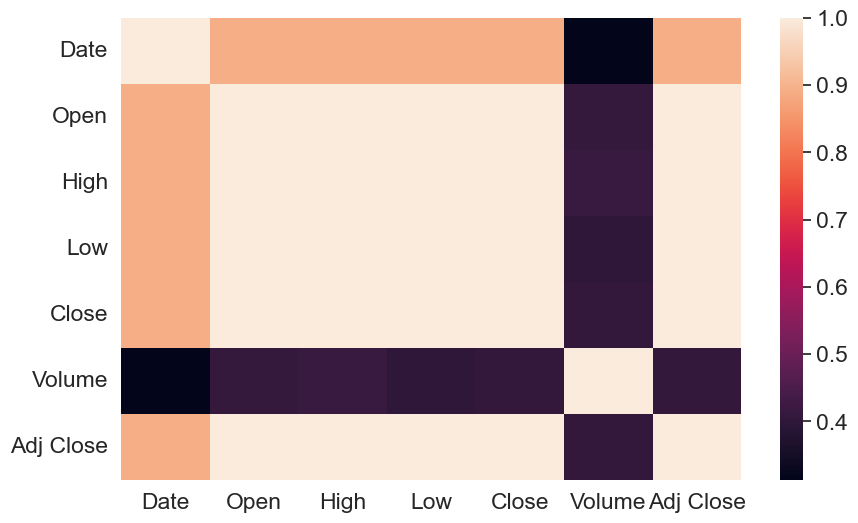

In [86]:
sns.heatmap(data.corr())
plt.show()

In [87]:
data.describe()

,Date,Open,High,Low,Close,Volume,Adj Close
count,1692,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,2013-11-06 02:53:37.021276416,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
min,2010-06-29 00:00:00,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,2012-03-01 18:00:00,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,2013-11-05 12:00:00,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,2015-07-14 06:00:00,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,2017-03-17 00:00:00,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009
std,NaN,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187


In [88]:
data[['Open','High','Low','Close','Adj Close']].value_counts()

Open        High        Low         Close       Adj Close 
16.139999   17.520000   15.570000   17.459999   17.459999     1
206.369995  207.000000  201.559998  205.220001  205.220001    1
208.429993  210.369995  206.119995  210.089996  210.089996    1
208.220001  209.990005  206.500000  208.449997  208.449997    1
208.199997  210.899994  205.869995  207.669998  207.669998    1
                                                             ..
33.410000   34.000000   33.000000   33.619999   33.619999     1
            33.700001   32.090000   32.250000   32.250000     1
33.380001   33.650002   33.020000   33.220001   33.220001     1
33.290001   35.680000   32.189999   34.570000   34.570000     1
287.670013  288.000000  280.100006  281.190002  281.190002    1
Name: count, Length: 1692, dtype: int64

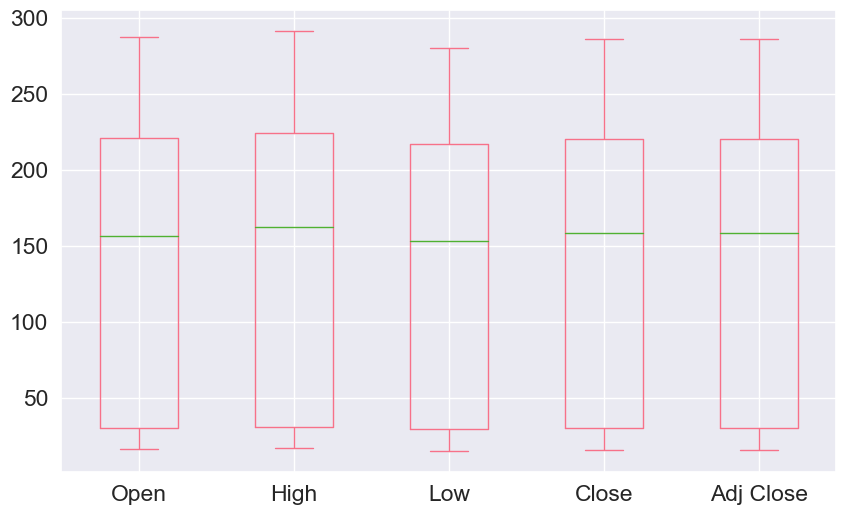

In [89]:
data[['Open','High','Low','Close','Adj Close']].plot(kind='box')
plt.show()

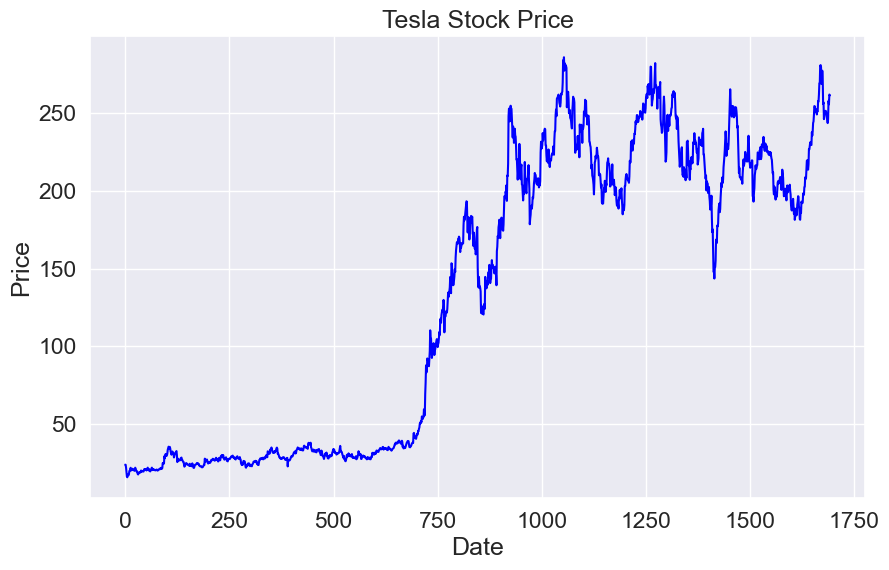

In [90]:
sns.set_style('darkgrid')
sns.lineplot(data=data['Close'],color='blue')
sns.set(rc={'figure.figsize':(10,6)})
sns.set(font_scale=1.5)
sns.set_palette('husl')
plt.title('Tesla Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Model Buliding

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [92]:
X=np.array(data.index).reshape(-1,1)
Y=data['Close']
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [93]:
scaler=StandardScaler().fit(x_train)

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

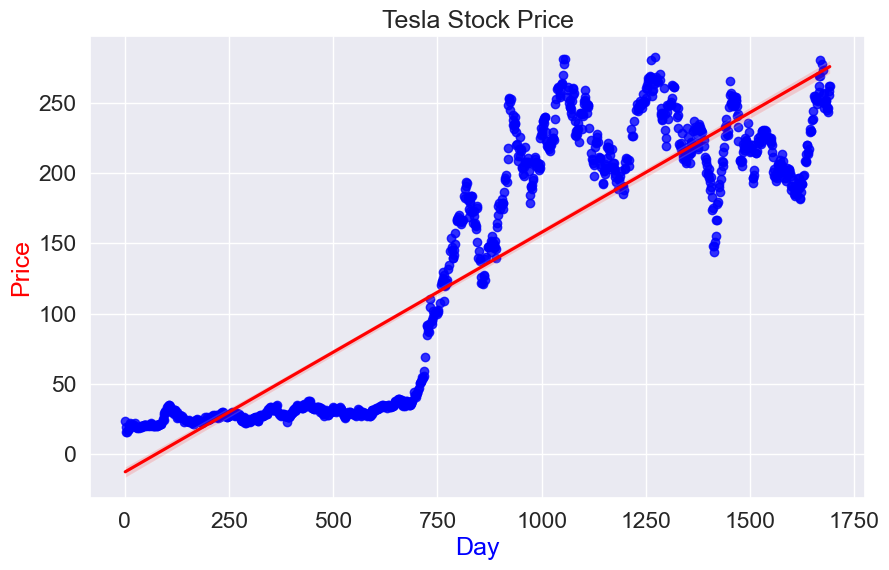

In [96]:
# Create a scatter plot with a regression line
df_train = pd.DataFrame({'Day': x_train.T[0], 'Price': y_train})
plt.figure(figsize=(10, 6))
sns.regplot(x='Day', y='Price', data=df_train, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Tesla Stock Price')
plt.xlabel('Day', color='blue')
plt.ylabel('Price', color='red')
plt.show()

In [97]:
scores=f'''
{'metric'.ljust(10)}{'Train'.center(20)}
{'r2_score'.ljust(10)}{r2_score(y_train,lm.predict(x_train))}\t{r2_score(y_test,lm.predict(x_test))}
{'MSE'.ljust(10)}{mse(y_train,lm.predict(x_train))}\t{mse(y_test,lm.predict(x_test))}
'''
print(scores)


metric           Train        
r2_score  0.7929900409846331	0.7956409009085726
MSE       1836.922396703335	1823.8784763131885

